In [2]:
import pandas as pd

# Load the datasets
dog_gene_data = pd.read_csv(r'D:\Study material\SEM 6\DV\DV Genetic network\datasets\Dog gene data.csv', encoding='ISO-8859-1')
dog_phene_data = pd.read_csv(r'D:\Study material\SEM 6\DV\DV Genetic network\datasets\Dog phene.csv', encoding='ISO-8859-1')

# Display basic information about the datasets
print("Dog Gene Data Info:")
print(dog_gene_data.info())
print("\nDog Phene Data Info:")
print(dog_phene_data.info())

# Check for missing values
print("\nMissing Values in Dog Gene Data:")
print(dog_gene_data.isnull().sum())
print("\nMissing Values in Dog Phene Data:")
print(dog_phene_data.isnull().sum())

# Check for duplicates
print("\nDuplicate Records in Dog Gene Data:", dog_gene_data.duplicated().sum())
print("Duplicate Records in Dog Phene Data:", dog_phene_data.duplicated().sum())

# Preview the first few rows
print("\nDog Gene Data Preview:")
print(dog_gene_data.head())
print("\nDog Phene Data Preview:")
print(dog_phene_data.head())


Dog Gene Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gene Symbol              380 non-null    object
 1   Gene Description         375 non-null    object
 2   Species Scientific Name  380 non-null    object
 3   Species Common Name      380 non-null    object
 4   Gene Type                380 non-null    object
dtypes: object(5)
memory usage: 15.0+ KB
None

Dog Phene Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OMIA ID                           1000 non-null   object 
 1   Phene                             1000 non-null   object 
 2   Species Scientific Name           1000 non-null   object 
 3   Species Comm

Preprocessing

In [3]:
dog_gene_data['Gene Description'].fillna('Unknown', inplace=True)
cleaned_phene_data = dog_phene_data.dropna(subset=['Gene'])


C:\Users\Latha E\AppData\Local\Temp\ipykernel_15924\1440184763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dog_gene_data['Gene Description'].fillna('Unknown', inplace=True)


In [4]:
gene_phene_network = pd.merge(cleaned_phene_data, dog_gene_data, left_on='Gene', right_on='Gene Symbol', how='left')


In [5]:
gene_phene_network.drop(['Species Scientific Name_x', 'Species Common Name_x','Species Scientific Name_y', 'Species Common Name_y'], axis=1, inplace=True)


In [6]:
gene_phene_network.head()


,OMIA ID,Phene,Gene,Year Key Mutation First Reported,Date Last Modified,Gene Symbol,Gene Description,Gene Type
0,OMIA:002922-9615,Ataxia with isolated vitamin E deficiency,TTPA,2025.0,31-01-2025,TTPA,alpha tocopherol transfer protein,protein-coding
1,OMIA:002917-9615,Hyperbiliverdinaemia,BLVRA,2024.0,31-01-2025,BLVRA,biliverdin reductase A,protein-coding
2,OMIA:002916-9615,"Charcot-Marie-Tooth disease, ITPR3-related",ITPR3,2025.0,22-01-2025,ITPR3,"inositol 1,4,5-trisphosphate receptor type 3",protein-coding
3,OMIA:002876-9615,"Neuroaxonal dystrophy, RNF170-related",RNF170,2024.0,28-08-2024,RNF170,ring finger protein 170,protein-coding
4,OMIA:002854-9615,"Immunodeficiency, CARD9-related",CARD9,2024.0,08-05-2024,CARD9,caspase recruitment domain family member 9,protein-coding


In [7]:
gene_phene_network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OMIA ID                           368 non-null    object 
 1   Phene                             368 non-null    object 
 2   Gene                              368 non-null    object 
 3   Year Key Mutation First Reported  367 non-null    float64
 4   Date Last Modified                368 non-null    object 
 5   Gene Symbol                       356 non-null    object 
 6   Gene Description                  356 non-null    object 
 7   Gene Type                         356 non-null    object 
dtypes: float64(1), object(7)
memory usage: 23.1+ KB


Out of 368 records, 356 have valid gene information.

12 records are missing gene details (Gene Symbol, Gene Description, or Gene Type).

367 records contain the Year Key Mutation First Reported, while 1 record has it missing.

All records have a Phene associated, making it suitable for disease analysis.





HEATMAP (to understand missing data)

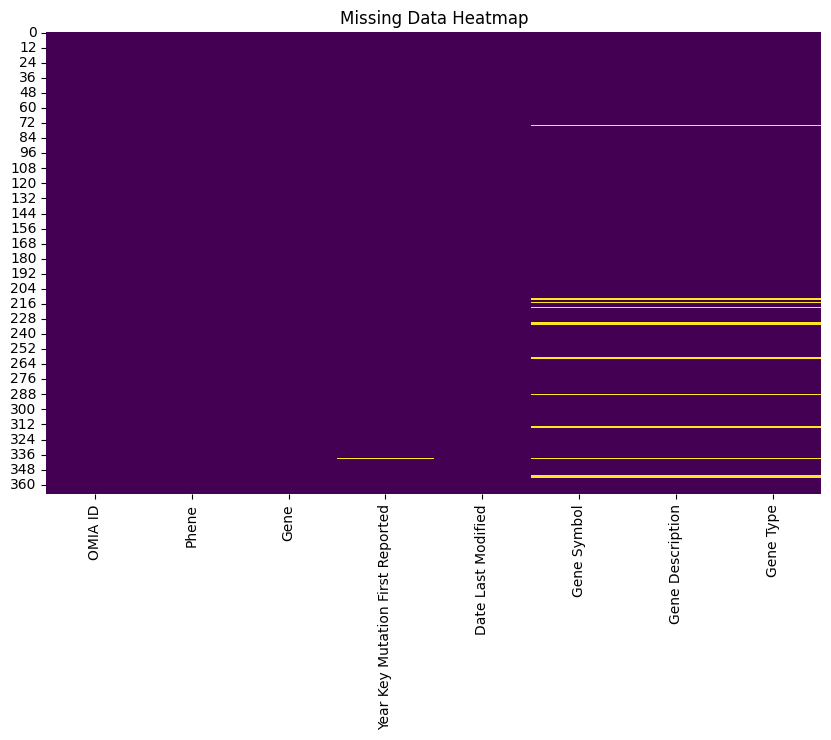

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap to visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(gene_phene_network.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Heatmap')
plt.show()


In [9]:
gene_phene_network.to_csv('C:/Users/Latha E/OneDrive/Documents/stupid/DV/dog_gene_phene_network.csv', index=False)    

Conditional Data Cleaning

Retain records if they contain critical information like:

~ Gene Symbol and Phene

~ Gene Description or Gene Type

Remove records only if:

~ Both Gene Symbol and Gene Type are missing.

~ Year Key Mutation First Reported is missing (if time-based analysis is important).



In [10]:
# Remove records where both Gene Symbol and Gene Type are missing
cleaned_network = gene_phene_network[~(gene_phene_network['Gene Symbol'].isnull() & gene_phene_network['Gene Type'].isnull())]

#  Optionally remove records where Year Key Mutation First Reported is missing (if required)
cleaned_network = cleaned_network[~cleaned_network['Year Key Mutation First Reported'].isnull()]

# Reset index for cleaner output
cleaned_network.reset_index(drop=True, inplace=True)

# Summary
print(f"Original Records: {len(gene_phene_network)}")
print(f"Cleaned Records: {len(cleaned_network)}")
print("Data Cleaning Complete!")

# Preview cleaned data
cleaned_network.head()



Original Records: 368
Cleaned Records: 356
Data Cleaning Complete!


,OMIA ID,Phene,Gene,Year Key Mutation First Reported,Date Last Modified,Gene Symbol,Gene Description,Gene Type
0,OMIA:002922-9615,Ataxia with isolated vitamin E deficiency,TTPA,2025.0,31-01-2025,TTPA,alpha tocopherol transfer protein,protein-coding
1,OMIA:002917-9615,Hyperbiliverdinaemia,BLVRA,2024.0,31-01-2025,BLVRA,biliverdin reductase A,protein-coding
2,OMIA:002916-9615,"Charcot-Marie-Tooth disease, ITPR3-related",ITPR3,2025.0,22-01-2025,ITPR3,"inositol 1,4,5-trisphosphate receptor type 3",protein-coding
3,OMIA:002876-9615,"Neuroaxonal dystrophy, RNF170-related",RNF170,2024.0,28-08-2024,RNF170,ring finger protein 170,protein-coding
4,OMIA:002854-9615,"Immunodeficiency, CARD9-related",CARD9,2024.0,08-05-2024,CARD9,caspase recruitment domain family member 9,protein-coding


In [11]:
gene_phene_network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OMIA ID                           368 non-null    object 
 1   Phene                             368 non-null    object 
 2   Gene                              368 non-null    object 
 3   Year Key Mutation First Reported  367 non-null    float64
 4   Date Last Modified                368 non-null    object 
 5   Gene Symbol                       356 non-null    object 
 6   Gene Description                  356 non-null    object 
 7   Gene Type                         356 non-null    object 
dtypes: float64(1), object(7)
memory usage: 23.1+ KB


In [12]:
cleaned_network.to_csv('C:/Users/Latha E/OneDrive/Documents/stupid/DV/cleaned_dog_gene_phene_network.csv', index=False)

# BASIC PLOTS

1. Data Overview

In [13]:
df = pd.read_csv(r'D:\Study material\SEM 6\DV\DV Genetic network\datasets\cleaned_dog_gene_phene_network.csv').copy()

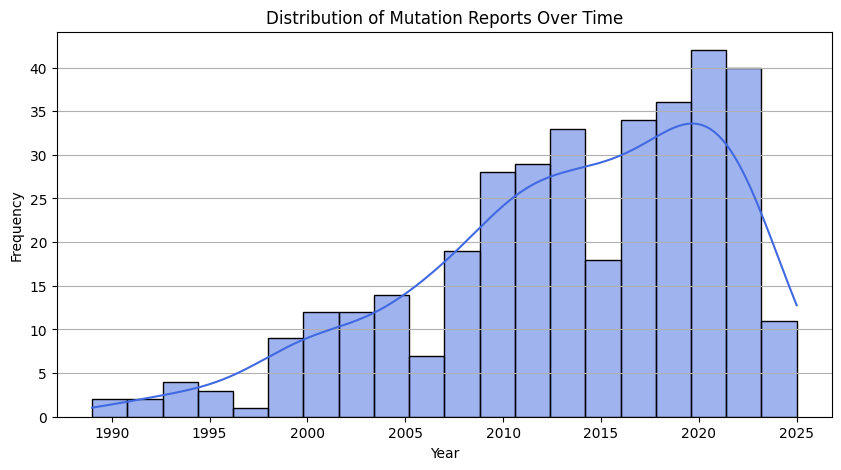

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Year Key Mutation First Reported'].dropna(), bins=20, kde=True, color='royalblue')
plt.title('Distribution of Mutation Reports Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


2. Gene and Phene Analysis


C:\Users\Latha E\AppData\Local\Temp\ipykernel_15924\3806050760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Phene'], order=df['Phene'].value_counts().index[:10], palette='viridis')


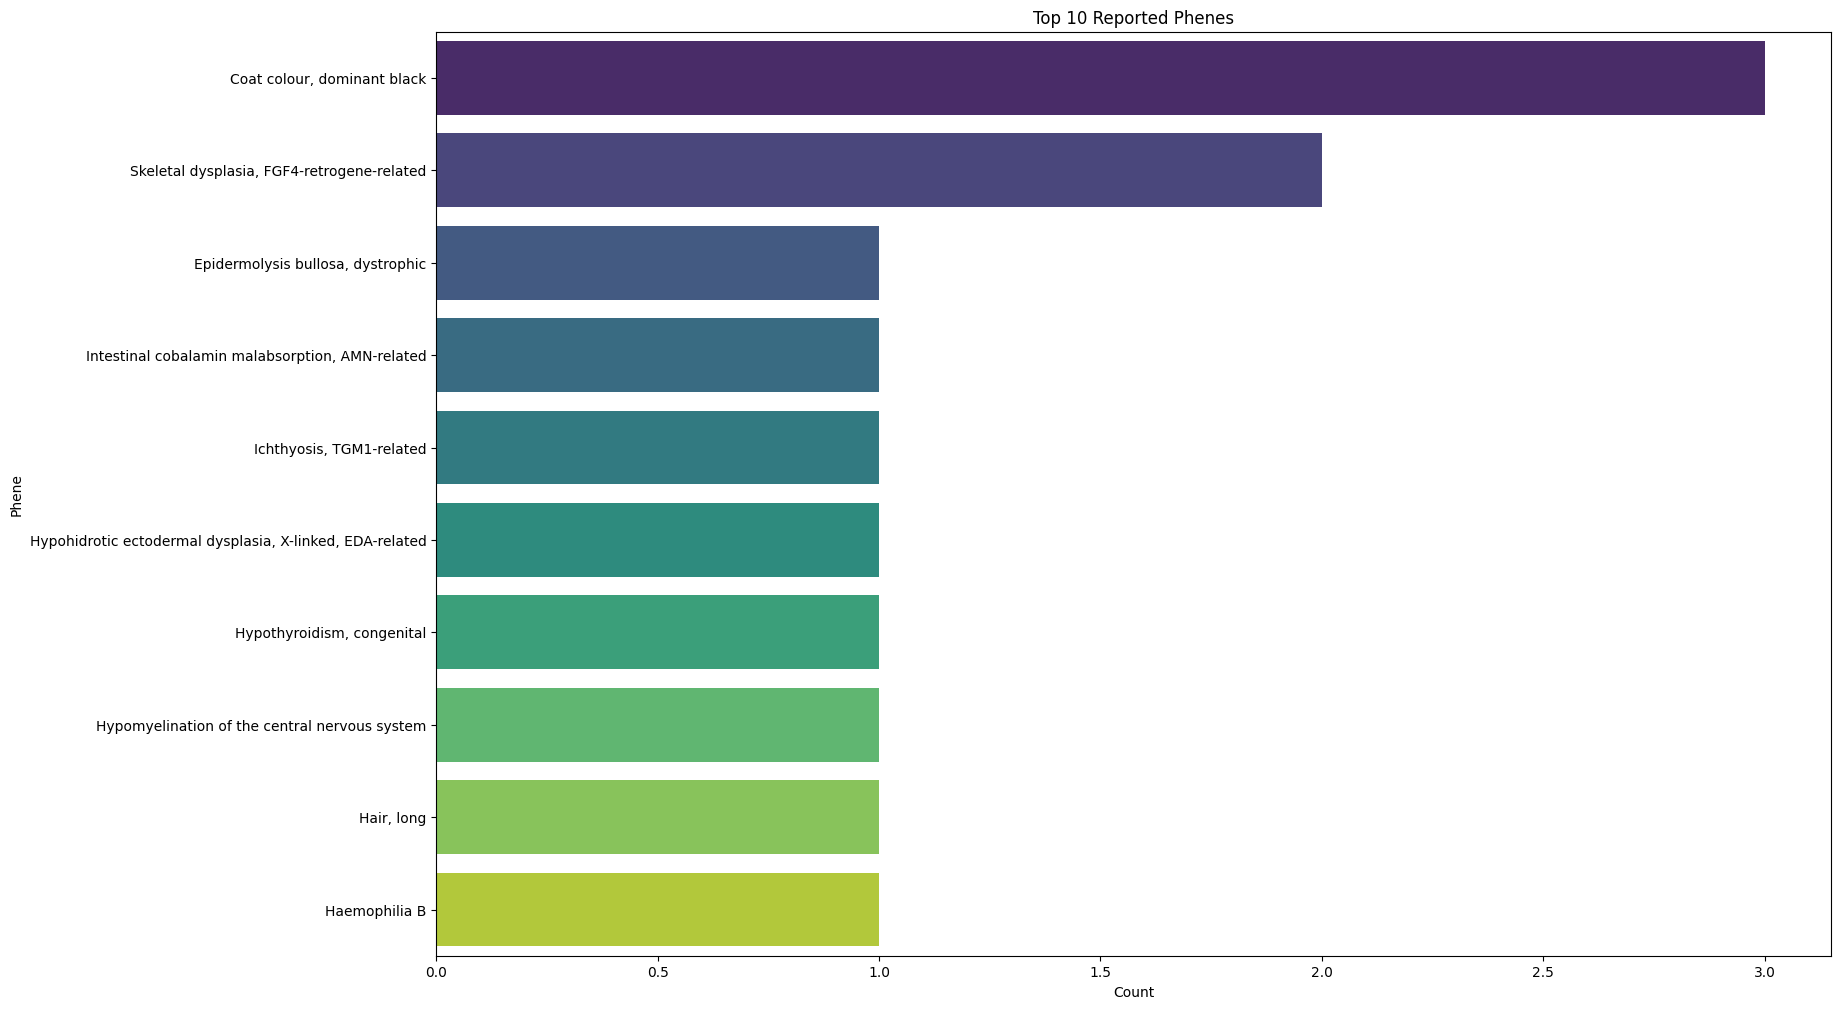

In [15]:
# Top 10 Phenes
plt.figure(figsize=(18, 12))
sns.countplot(y=df['Phene'], order=df['Phene'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Reported Phenes')
plt.xlabel('Count')
plt.ylabel('Phene')
plt.show()

C:\Users\Latha E\AppData\Local\Temp\ipykernel_15924\1327638824.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Gene'], order=df['Gene'].value_counts().index[:10], palette='magma')


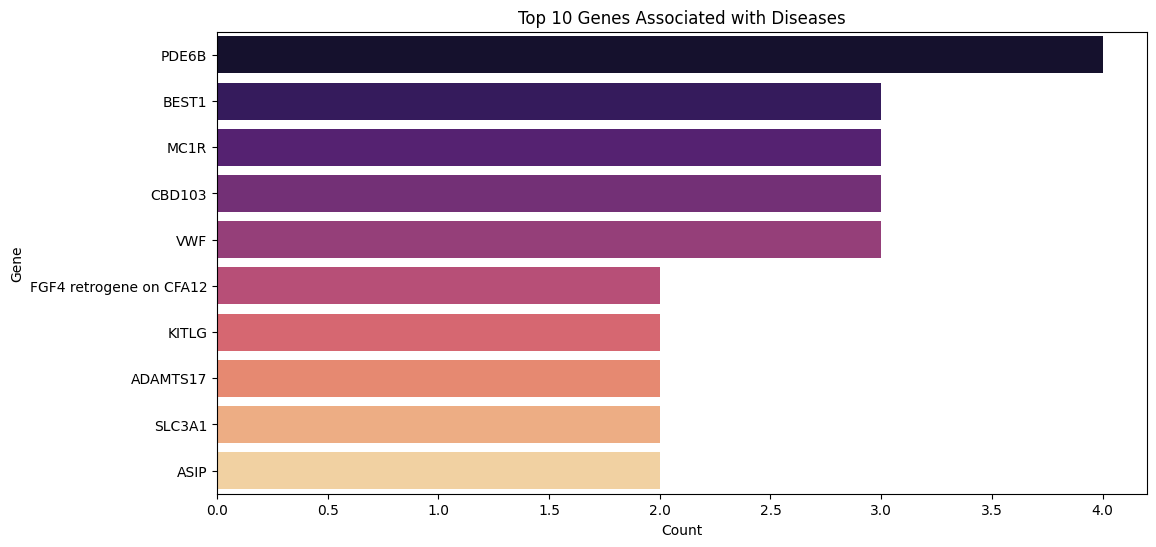

In [16]:
# Top 10 Genes
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Gene'], order=df['Gene'].value_counts().index[:10], palette='magma')
plt.title('Top 10 Genes Associated with Diseases')
plt.xlabel('Count')
plt.ylabel('Gene')
plt.show()

C:\Users\Latha E\AppData\Local\Temp\ipykernel_15924\2268708032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gene Type', data=df, palette='Set2')


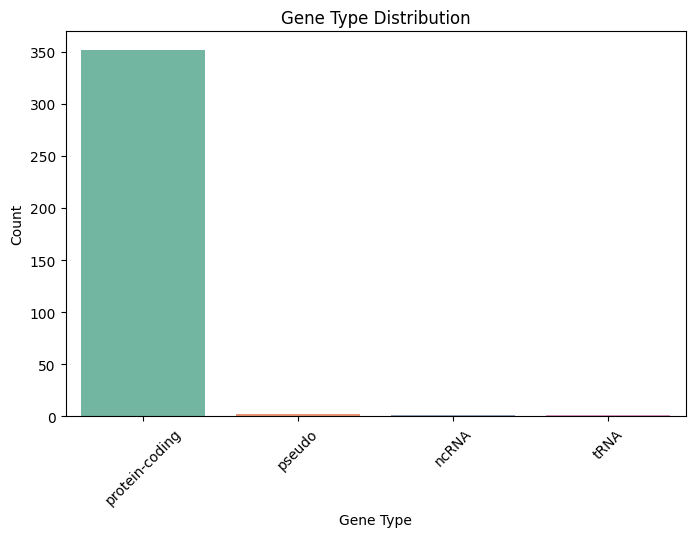

In [17]:
# Gene Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gene Type', data=df, palette='Set2')
plt.title('Gene Type Distribution')
plt.ylabel('Count')
plt.xlabel('Gene Type')
plt.xticks(rotation=45)
plt.show()

3. Temporal Analysis

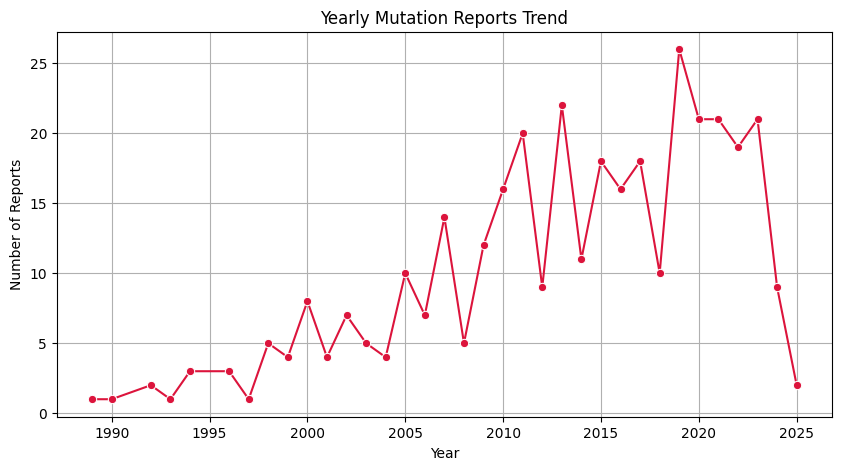

In [18]:
# Line Plot - Year-wise mutation reports
yearly_data = df.groupby('Year Key Mutation First Reported').size().reset_index(name='Count')
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year Key Mutation First Reported', y='Count', data=yearly_data, marker='o', color='crimson')
plt.title('Yearly Mutation Reports Trend')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.show()

4. Correlation Analysis

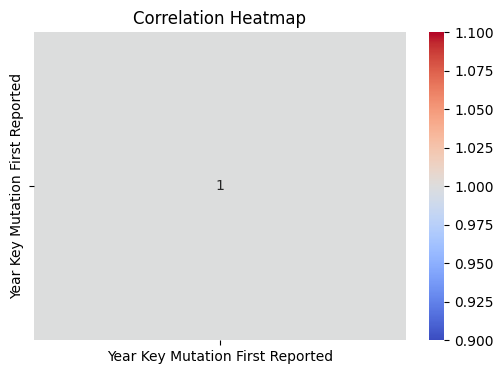

In [19]:
# Correlation heatmap (if applicable)
if 'Year Key Mutation First Reported' in df.columns:
    corr_data = df[['Year Key Mutation First Reported']].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_data, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print('No numerical data available for correlation analysis.')

Correlation requires numerical columns, but the only numerical column is "Year Key Mutation First Reported."

Since a single column can't correlate with itself, it results in a blank or meaningless heatmap.

# Graph and Centralities

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go


G = nx.Graph()

In [21]:
# Add Nodes and Edges
for _, row in df.iterrows():
    gene_node = f"Gene: {row['Gene']}"
    phene_node = f"Phene: {row['Phene']}"
    G.add_node(gene_node, type='gene')
    G.add_node(phene_node, type='phene')
    G.add_edge(gene_node, phene_node)

In [22]:
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph created with 689 nodes and 353 edges.


In [23]:
# Centrality Calculations
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
clustering_coefficient = nx.clustering(G)

In [24]:
print(nx.get_node_attributes(G, 'type'))


{'Gene: TTPA': 'gene', 'Phene: Ataxia with isolated vitamin E deficiency': 'phene', 'Gene: BLVRA': 'gene', 'Phene: Hyperbiliverdinaemia': 'phene', 'Gene: ITPR3': 'gene', 'Phene: Charcot-Marie-Tooth disease, ITPR3-related': 'phene', 'Gene: RNF170': 'gene', 'Phene: Neuroaxonal dystrophy, RNF170-related': 'phene', 'Gene: CARD9': 'gene', 'Phene: Immunodeficiency, CARD9-related': 'phene', 'Gene: DNAJC21': 'gene', 'Phene: Microphthalmia with haematopoietic defects, DNAJC21-related': 'phene', 'Gene: NDUFS7': 'gene', 'Phene: Leigh syndrome, NDUFS7-related': 'phene', 'Gene: AMPD2': 'gene', 'Phene: Pontocerebellar hypoplasia, AMPD2-related': 'phene', 'Gene: CARMIL2': 'gene', 'Phene: Immunodeficiency, CARMIL2-related': 'phene', 'Gene: MECR': 'gene', 'Phene: Polioencephalopathy, MECR-related': 'phene', 'Gene: COL11A1': 'gene', 'Phene: Multiple ocular defects, COL11A1-related': 'phene', 'Gene: LMNA': 'gene', 'Phene: Cardiomyopathy, dilated, LMNA-related': 'phene', 'Gene: SACS': 'gene', 'Phene: Atax

In [25]:
for node in G.nodes():
    if 'type' not in G.nodes[node]:
        G.nodes[node]['type'] = 'gene'  # Assume as Gene if missing


Graph

In [26]:
import networkx as nx
import plotly.graph_objects as go

# Fix missing or incorrect node types
for node in G.nodes():
    if G.nodes[node].get('type') not in ['gene', 'phene']:
        G.nodes[node]['type'] = 'gene'

# Adjust node colors and sizes
node_colors = ['#FF6347' if G.nodes[node]['type'] == 'phene' else '#4682B4' for node in G.nodes()]
node_sizes = [30 if G.nodes[node]['type'] == 'phene' else 15 for node in G.nodes()]

# Spread nodes using spring layout
pos = nx.spring_layout(G, seed=42, k=0.4)  # Increase k for better spread

# Extract positions
x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]

# Extract edge positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Edge plot with improved visibility
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(width=0.7, color='rgba(100,100,100,0.5)'),
    hoverinfo='none'
)

# Node plot
node_trace = go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode='markers',
    marker=dict(
        size=node_sizes,
        color=node_colors,
        line=dict(width=0.8, color='black')
    ),
    hoverinfo='text',
    text=[f'{node} ({G.nodes[node]["type"]})' for node in G.nodes()]
)

# Add Legend
legend_items = [
    go.Scatter(x=[None], y=[None], mode='markers',
               marker=dict(size=20, color='#FF6347'), name='Phene'),
    go.Scatter(x=[None], y=[None], mode='markers',
               marker=dict(size=20, color='#4682B4'), name='Gene')
]

# Final interactive graph
fig = go.Figure(data=[edge_trace, node_trace] + legend_items)
fig.update_layout(
    title='Interactive Genetic Network with Enhanced Visibility',
    showlegend=True,
    hovermode='closest',
    width=1200,
    height=1000,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


In [27]:
# List all gene nodes to check available names
gene_nodes = [node for node, data in G.nodes(data=True) if data.get('type') == 'gene']
print("Available Gene Nodes:", gene_nodes)


Available Gene Nodes: ['Gene: TTPA', 'Gene: BLVRA', 'Gene: ITPR3', 'Gene: RNF170', 'Gene: CARD9', 'Gene: DNAJC21', 'Gene: NDUFS7', 'Gene: AMPD2', 'Gene: CARMIL2', 'Gene: MECR', 'Gene: COL11A1', 'Gene: LMNA', 'Gene: SACS', 'Gene: HSD17B3', 'Gene: AMHR2', 'Gene: RALGAPA1', 'Gene: MC5R', 'Gene: SH3TC2', 'Gene: MPZ', 'Gene: PCYT2', 'Gene: MTMR2', 'Gene: CNGB1', 'Gene: MCHR2', 'Gene: ABCC9', 'Gene: LMBR1L', 'Gene: CYTB', 'Gene: FAN1', 'Gene: TNR', 'Gene: SDR9C7', 'Gene: GUCY2D', 'Gene: SLC7A10', 'Gene: STK36', 'Gene: COL4A4', 'Gene: SCN9A', 'Gene: RETN', 'Gene: ATP7A', 'Gene: PCYT1A', 'Gene: VMP1', 'Gene: CNP', 'Gene: ACADM', 'Gene: CDH23', 'Gene: GPR22', 'Gene: EHBP1L1', 'Gene: MFF', 'Gene: EPS8L2', 'Gene: FGF4 retrogene CFA18', 'Gene: ANLN', 'Gene: FYCO1', 'Gene: DNM2', 'Gene: IGF1-AS (LOC111090066)', 'Gene: HACE1', 'Gene: BBS2', 'Gene: MIA3', 'Gene: LARGE', 'Gene: LAMA2', 'Gene: XDH', 'Gene: RASGRP2', 'Gene: KRT1', 'Gene: FGA', 'Gene: ABHD5', 'Gene: SEPP1', 'Gene: RBM20', 'Gene: GDF9', '

In [28]:
import networkx as nx
import plotly.graph_objects as go

def visualize_gene_to_phene_connections(G, target_gene):
    # Ensure correct format for the gene node
    if not target_gene.startswith("Gene: "):
        target_gene = f"Gene: {target_gene}"

    if target_gene not in G:
        print(f"Gene '{target_gene}' not found in the network.")
        return
    
    # Extract neighbors (connected nodes) of the target gene
    neighbors = list(G.neighbors(target_gene))

    if not neighbors:
        print(f"No connected phenes or genes found for {target_gene}.")
        return

    # Create a subgraph containing the gene and its connected phenes
    subgraph = G.subgraph([target_gene] + neighbors)

    # Adjust node colors and sizes
    node_colors = ['#FF6347' if G.nodes[node]['type'] == 'phene' else '#4682B4' for node in subgraph.nodes()]
    node_sizes = [40 if G.nodes[node]['type'] == 'phene' else 80 for node in subgraph.nodes()]

    # Layout for better separation
    pos = nx.spring_layout(subgraph, seed=42, k=0.7)

    # Extract positions
    x_nodes = [pos[node][0] for node in subgraph.nodes()]
    y_nodes = [pos[node][1] for node in subgraph.nodes()]

    # Extract edge positions
    edge_x = []
    edge_y = []
    for edge in subgraph.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    # Edge Plot
    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        mode='lines',
        line=dict(width=1.2, color='rgba(100,100,100,0.5)'),
        hoverinfo='none'
    )

    # Node Plot
    node_trace = go.Scatter(
        x=x_nodes,
        y=y_nodes,
        mode='markers',
        marker=dict(
            size=node_sizes,
            color=node_colors,
            line=dict(width=0.8, color='black')
        ),
        hoverinfo='text',
        text=[f'{node} ({G.nodes[node]["type"]})' for node in subgraph.nodes()]
    )

    # Add Legend
    legend_items = [
        go.Scatter(x=[None], y=[None], mode='markers',
                   marker=dict(size=20, color='#FF6347'), name='Phene'),
        go.Scatter(x=[None], y=[None], mode='markers',
                   marker=dict(size=20, color='#4682B4'), name='Gene')
    ]

    # Final Plot
    fig = go.Figure(data=[edge_trace, node_trace] + legend_items)
    fig.update_layout(
        title=f'Gene-to-Phene Connections for {target_gene}',
        showlegend=True,
        hovermode='closest',
        width=1200,
        height=1000,
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False),
    )
    fig.show()

# Example: Visualizing for a specific gene
visualize_gene_to_phene_connections(G, 'PDE6B')


Dash interactive click on gene-phene


In [29]:
!pip install networkx plotly dash


Defaulting to user installation because normal site-packages is not writeable


In [58]:
import networkx as nx
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Initialize Dash app
app = Dash(__name__)

# Fix missing or incorrect node types
for node in G.nodes():
    if G.nodes[node].get('type') not in ['gene', 'phene']:
        G.nodes[node]['type'] = 'gene'

# Layout positions
pos = nx.spring_layout(G, seed=42, k=0.4)

# Function to create traces
def create_traces(graph, pos, highlight_gene=None):
    # Adjust node colors and sizes
    node_colors = ['#FF6347' if graph.nodes[node]['type'] == 'phene' else '#4682B4' for node in graph.nodes()]
    node_sizes = [30 if graph.nodes[node]['type'] == 'phene' else 15 for node in graph.nodes()]

    # Extract positions
    x_nodes = [pos[node][0] for node in graph.nodes()]
    y_nodes = [pos[node][1] for node in graph.nodes()]

    # Extract edge positions
    edge_x = []
    edge_y = []
    for edge in graph.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    # Edge plot
    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        mode='lines',
        line=dict(width=0.7, color='rgba(100,100,100,0.5)'),
        hoverinfo='none'
    )

    # Node plot
    node_trace = go.Scatter(
        x=x_nodes,
        y=y_nodes,
        mode='markers',
        marker=dict(
            size=node_sizes,
            color=node_colors,
            line=dict(width=0.8, color='black')
        ),
        hoverinfo='text',
        text=[f'{node} ({graph.nodes[node]["type"]})' for node in graph.nodes()],
        customdata=[node for node in graph.nodes()]
    )

    # Highlight selected gene
    if highlight_gene:
        neighbors = list(graph.neighbors(highlight_gene))
        highlighted_nodes = [highlight_gene] + neighbors
        highlight_pos = {node: pos[node] for node in highlighted_nodes}

        x_highlight = [highlight_pos[node][0] for node in highlighted_nodes]
        y_highlight = [highlight_pos[node][1] for node in highlighted_nodes]

        highlight_trace = go.Scatter(
            x=x_highlight,
            y=y_highlight,
            mode='markers',
            marker=dict(
                size=[80 if node == highlight_gene else 40 for node in highlighted_nodes],
                color=['#FFD700' if node == highlight_gene else '#FF6347' for node in highlighted_nodes],
                line=dict(width=1.5, color='black')
            ),
            hoverinfo='text',
            text=[f'{node} (Highlighted)' for node in highlighted_nodes]
        )
    else:
        highlight_trace = None

    return [edge_trace, node_trace] + ([highlight_trace] if highlight_trace else [])

# Initial Plot
fig = go.Figure(data=create_traces(G, pos))
fig.update_layout(
    title='Interactive Genetic Network with Click-to-Explore',
    showlegend=True,
    hovermode='closest',
    width=1200,
    height=1000,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)

# Dash App Layout
app.layout = html.Div([
    dcc.Graph(id='network-graph', figure=fig),
    html.Div(id='clicked-node', style={'margin-top': '20px', 'font-size': '20px'})
])

# Callback to handle clicks
@app.callback(
    Output('network-graph', 'figure'),
    Output('clicked-node', 'children'),
    Input('network-graph', 'clickData')
)
def update_graph(clickData):
    if clickData is None:
        return fig, "Click a gene node to see connected phenes."
    
    clicked_node = clickData['points'][0]['customdata']

    if G.nodes[clicked_node]['type'] == 'gene':
        return go.Figure(data=create_traces(G, pos, highlight_gene=clicked_node)), f"Showing connections for {clicked_node}"
    else:
        return fig, "Click on a gene node to explore its phenes."

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


Degree Centrality

In [31]:

# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Node Colors and Sizes based on Degree Centrality
node_colors = [degree_centrality[node] for node in G.nodes()]
node_sizes = [500 * degree_centrality[node] + 10 for node in G.nodes()]

# Plot Nodes
pos = nx.spring_layout(G, seed=42, k=0.4)

x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]

node_trace = go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode='markers',
    marker=dict(
        size=node_sizes,
        color=node_colors,
        colorscale='Viridis',
        colorbar=dict(title="Degree Centrality"),
        line=dict(width=0.5, color='black')
    ),
    hoverinfo='text',
    text=[f'{node}: {degree_centrality[node]:.4f}' for node in G.nodes()]
)

# Plot Edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(width=0.5, color='rgba(150,150,150,0.5)'),
    hoverinfo='none'
)

# Plot Figure
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title='Degree Centrality Visualization',
    showlegend=False,
    hovermode='closest',
    width=1000,
    height=800,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


Closeness centrality

In [32]:
# Calculate Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Node Colors and Sizes based on Closeness Centrality
node_colors = [closeness_centrality[node] for node in G.nodes()]
node_sizes = [500 * closeness_centrality[node] + 10 for node in G.nodes()]

node_trace.marker.color = node_colors
node_trace.marker.size = node_sizes
node_trace.marker.colorscale = 'Plasma'
node_trace.marker.colorbar.title = "Closeness Centrality"
node_trace.text = [f'{node}: {closeness_centrality[node]:.4f}' for node in G.nodes()]

fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)
# Adjust layout size for better readability
fig.update_layout(
    title='Closeness Centrality Visualization',
    width=1000,  # Increase the width
    height=800,  # Increase the height
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()

Betweeness 

In [33]:
# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Node Colors and Sizes based on Betweenness Centrality
node_colors = [betweenness_centrality[node] for node in G.nodes()]
node_sizes = [500 * betweenness_centrality[node] + 10 for node in G.nodes()]

node_trace.marker.color = node_colors
node_trace.marker.size = node_sizes
node_trace.marker.colorscale = 'Viridis'
node_trace.marker.colorbar.title = "Betweenness Centrality"
node_trace.text = [f'{node}: {betweenness_centrality[node]:.4f}' for node in G.nodes()]

# Plotting
fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

# Adjust layout size
fig.update_layout(
    title='Betweenness Centrality Visualization',
    width=1000,
    height=800,
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


Eigen vector centrality

In [34]:
# Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Node Colors and Sizes based on Eigenvector Centrality
node_colors = [eigenvector_centrality[node] for node in G.nodes()]
node_sizes = [500 * eigenvector_centrality[node] + 10 for node in G.nodes()]

node_trace.marker.color = node_colors
node_trace.marker.size = node_sizes
node_trace.marker.colorscale = 'Viridis'
node_trace.marker.colorbar.title = "Eigenvector Centrality"
node_trace.text = [f'{node}: {eigenvector_centrality[node]:.4f}' for node in G.nodes()]

# Plotting
fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

# Adjust layout size
fig.update_layout(
    title='Eigenvector Centrality Visualization',
    width=1000,
    height=800,
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


Clustering Coefficient

In [35]:
print("Number of triangles:", sum(nx.triangles(G).values()) // 3)


Number of triangles: 0


In [36]:
# Calculate Clustering Coefficient
clustering_coefficient = nx.clustering(G)

# Node Colors and Sizes based on Clustering Coefficient
node_colors = [clustering_coefficient[node] for node in G.nodes()]
node_sizes = [500 * clustering_coefficient[node] + 10 for node in G.nodes()]

node_trace.marker.color = node_colors
node_trace.marker.size = node_sizes
node_trace.marker.colorscale = 'Plasma'
node_trace.marker.colorbar.title = "Clustering Coefficient"
node_trace.text = [f'{node}: {clustering_coefficient[node]:.4f}' for node in G.nodes()]

# Plotting
fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

# Adjust layout size
fig.update_layout(
    title='Clustering Coefficient Visualization',
    width=1000,
    height=800,
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


In [37]:
print(clustering_coefficient)


{'Gene: TTPA': 0, 'Phene: Ataxia with isolated vitamin E deficiency': 0, 'Gene: BLVRA': 0, 'Phene: Hyperbiliverdinaemia': 0, 'Gene: ITPR3': 0, 'Phene: Charcot-Marie-Tooth disease, ITPR3-related': 0, 'Gene: RNF170': 0, 'Phene: Neuroaxonal dystrophy, RNF170-related': 0, 'Gene: CARD9': 0, 'Phene: Immunodeficiency, CARD9-related': 0, 'Gene: DNAJC21': 0, 'Phene: Microphthalmia with haematopoietic defects, DNAJC21-related': 0, 'Gene: NDUFS7': 0, 'Phene: Leigh syndrome, NDUFS7-related': 0, 'Gene: AMPD2': 0, 'Phene: Pontocerebellar hypoplasia, AMPD2-related': 0, 'Gene: CARMIL2': 0, 'Phene: Immunodeficiency, CARMIL2-related': 0, 'Gene: MECR': 0, 'Phene: Polioencephalopathy, MECR-related': 0, 'Gene: COL11A1': 0, 'Phene: Multiple ocular defects, COL11A1-related': 0, 'Gene: LMNA': 0, 'Phene: Cardiomyopathy, dilated, LMNA-related': 0, 'Gene: SACS': 0, 'Phene: Ataxia, spastic, SACS-related': 0, 'Gene: HSD17B3': 0, 'Phene: XY difference of sexual development, HSD17B3-related': 0, 'Gene: AMHR2': 0, 'P

# 1: Identify Hubs and Bridges

 1.1 Identify Hubs using Degree Centrality


In [38]:
import networkx as nx
import plotly.graph_objects as go

# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Find top 10 hubs
top_hubs = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Hubs (High Degree Centrality):")
for node, centrality in top_hubs:
    print(f"{node}: {centrality}")

# Visualize
node_colors = [degree_centrality[node] for node in G.nodes()]
node_sizes = [500 * degree_centrality[node] + 10 for node in G.nodes()]

# Update Plot
node_trace.marker.color = node_colors
node_trace.marker.size = node_sizes
node_trace.marker.colorscale = 'YlOrRd'
node_trace.marker.colorbar.title = "Degree Centrality"
node_trace.text = [f'{node}: {degree_centrality[node]:.4f}' for node in G.nodes()]

# Plot
fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)
# Update layout with larger size
fig.update_layout(
    title='Degree Centrality Visualization (Hubs)',
    width=1200,  # Increase width
    height=900,  # Increase height
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),)
fig.show()


Top 10 Hubs (High Degree Centrality):
Gene: PDE6B: 0.005813953488372093
Gene: MC1R: 0.00436046511627907
Gene: BEST1: 0.00436046511627907
Gene: VWF: 0.00436046511627907
Gene: KITLG: 0.0029069767441860465
Gene: ADAMTS17: 0.0029069767441860465
Gene: SLC3A1: 0.0029069767441860465
Gene: ASIP: 0.0029069767441860465
Gene: KIT: 0.0029069767441860465
Gene: RSPO2: 0.0029069767441860465


 1.2 Identify Bridges using Betweenness Centrality

In [39]:
# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Find top 10 bridges
top_bridges = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Bridges (High Betweenness Centrality):")
for node, centrality in top_bridges:
    print(f"{node}: {centrality}")

# Visualize
node_colors = [betweenness_centrality[node] for node in G.nodes()]
node_sizes = [500 * betweenness_centrality[node] + 10 for node in G.nodes()]

# Update Plot
node_trace.marker.color = node_colors
node_trace.marker.size = node_sizes
node_trace.marker.colorscale = 'Blues'
node_trace.marker.colorbar.title = "Betweenness Centrality"
node_trace.text = [f'{node}: {betweenness_centrality[node]:.4f}' for node in G.nodes()]

# Plot
fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

fig.update_layout(
    title='Betweenness Centrality Visualization (Bridges)',
    width=1200,  # Increase width
    height=900,  # Increase height
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),)
fig.show()


Top 10 Bridges (High Betweenness Centrality):
Gene: PDE6B: 2.5388443180664162e-05
Gene: MC1R: 1.2694221590332081e-05
Gene: BEST1: 1.2694221590332081e-05
Gene: VWF: 1.2694221590332081e-05
Gene: KITLG: 4.23140719677736e-06
Gene: ADAMTS17: 4.23140719677736e-06
Gene: SLC3A1: 4.23140719677736e-06
Gene: ASIP: 4.23140719677736e-06
Gene: KIT: 4.23140719677736e-06
Gene: RSPO2: 4.23140719677736e-06


Louvain community detection

In [40]:
!pip install python-louvain

Defaulting to user installation because normal site-packages is not writeable


In [41]:
import community as community_louvain
import networkx as nx
import plotly.graph_objects as go

# Perform Louvain Community Detection
partition = community_louvain.best_partition(G)

# Visualize Communities
node_colors = [partition[node] for node in G.nodes()]
node_sizes = [30 if G.nodes[node]['type'] == 'phene' else 15 for node in G.nodes()]

node_trace.marker.color = node_colors
node_trace.marker.size = node_sizes
node_trace.marker.colorscale = 'Viridis'
node_trace.marker.colorbar.title = "Community"
node_trace.text = [f'{node} (Community: {partition[node]})' for node in G.nodes()]

# Plot
fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

fig.update_layout(
    title='Louvain Community Detection',
    width=1200,
    height=900,
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


Exploring further with Louvain community detection

In [42]:
# Total number of detected communities
num_communities = len(set(partition.values()))
print(f"Total Number of Communities: {num_communities}")


Total Number of Communities: 336


Louvain community detection assigns each node to a community by maximizing modularity.

The number of unique community labels represents how many distinct clusters were detected in the network.

This gives a general idea of the network’s modular structure — whether it's fragmented or tightly interconnected.

Higher number of communities might indicate a fragmented network with more isolated groups.

--> If the network is gene-phenotype based, these could represent genetic disorders with fewer cross-connections.

--> Rare or Isolated Communities:

* Some of these communities may contain very few nodes, representing rare genetic diseases or mutations.

Others might be disconnected due to a lack of biological research or experimental data.

Lower number of communities suggests stronger interconnections between nodes.

In [43]:
#community size distribution analysis

from collections import Counter

# Count nodes in each community
community_sizes = Counter(partition.values())
print("Community Size Distribution:")
for community, size in community_sizes.items():
    print(f"Community {community}: {size} nodes")


Community Size Distribution:
Community 1: 2 nodes
Community 2: 2 nodes
Community 5: 2 nodes
Community 6: 2 nodes
Community 9: 2 nodes
Community 10: 2 nodes
Community 12: 2 nodes
Community 14: 2 nodes
Community 17: 2 nodes
Community 18: 2 nodes
Community 20: 2 nodes
Community 22: 2 nodes
Community 25: 2 nodes
Community 26: 2 nodes
Community 28: 2 nodes
Community 31: 2 nodes
Community 33: 2 nodes
Community 34: 2 nodes
Community 37: 2 nodes
Community 39: 2 nodes
Community 41: 2 nodes
Community 43: 2 nodes
Community 44: 2 nodes
Community 46: 2 nodes
Community 49: 2 nodes
Community 51: 2 nodes
Community 53: 2 nodes
Community 55: 2 nodes
Community 57: 2 nodes
Community 59: 2 nodes
Community 61: 2 nodes
Community 63: 2 nodes
Community 65: 2 nodes
Community 66: 2 nodes
Community 69: 2 nodes
Community 70: 2 nodes
Community 72: 2 nodes
Community 75: 2 nodes
Community 77: 2 nodes
Community 78: 2 nodes
Community 80: 2 nodes
Community 83: 2 nodes
Community 84: 2 nodes
Community 86: 2 nodes
Communit

Small Communities (< 10 nodes):

Smaller clusters are often linked to rare genetic disorders or understudied mutations.

They may contain nodes representing niche diseases or novel findings that could be valuable for further research.

In [44]:
# Categorize communities based on size
large_communities = [com for com, size in community_sizes.items() if size >= 50]
small_communities = [com for com, size in community_sizes.items() if size < 10]

print(f"Large Communities (>= 50 nodes): {len(large_communities)}")
print(f"Small Communities (< 10 nodes): {len(small_communities)}")


Large Communities (>= 50 nodes): 0
Small Communities (< 10 nodes): 336


# Identifying central nodes in small comm. 

* Degree Centrality: Nodes with a higher number of connections.

* Betweenness Centrality: Nodes that act as bridges in the network, connecting different parts.

In [45]:
# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Combine and Find Top Nodes
centrality_data = [
    (node, degree_centrality[node], betweenness_centrality[node])
    for node in G.nodes()
]

# Sort Nodes by Centrality
sorted_data = sorted(centrality_data, key=lambda x: (x[1], x[2]), reverse=True)

# Display Top Central Nodes
print("Top 10 Central Nodes (Degree and Betweenness Centrality):")
print(f"{'Node':<30}{'Degree Centrality':<20}{'Betweenness Centrality'}")
for node, deg_cen, bet_cen in sorted_data[:10]:
    print(f"{node:<30}{deg_cen:<20.6f}{bet_cen:.6f}")


Top 10 Central Nodes (Degree and Betweenness Centrality):
Node                          Degree Centrality   Betweenness Centrality
Gene: PDE6B                   0.005814            0.000025
Gene: MC1R                    0.004360            0.000013
Gene: BEST1                   0.004360            0.000013
Gene: VWF                     0.004360            0.000013
Gene: KITLG                   0.002907            0.000004
Gene: ADAMTS17                0.002907            0.000004
Gene: SLC3A1                  0.002907            0.000004
Gene: ASIP                    0.002907            0.000004
Gene: KIT                     0.002907            0.000004
Gene: RSPO2                   0.002907            0.000004


**Gene: PDE6B**

Highest Degree Centrality: (0.0058)

Highest Betweenness Centrality: (0.000025)

**Inference:**

* PDE6B is highly connected and potentially associated with multiple phenotypes.

* It may play a significant role in retinal diseases, as seen in earlier observations of Retinal Atrophy.

* Targeting PDE6B could be relevant for therapeutic interventions.

**Gene: MC1R, BEST1, VWF**

Moderate Degree & Betweenness Centrality

**Inference:**

* These genes likely influence multiple pathways.

* MC1R is particularly linked to coat color variations, making it a central marker in phenotype research.

* VWF (Von Willebrand Factor) is critical in blood clotting disorders.

----
Highlighting central nodes & visualise relationships


In [46]:
# Extract Top 10 Central Nodes
top_nodes = set([node for node, _, _ in sorted_data[:10]])

# Node Colors and Sizes
node_colors = ['red' if node in top_nodes else 'lightgrey' for node in G.nodes()]
node_sizes = [80 if node in top_nodes else 20 for node in G.nodes()]

# Plot Edges
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(width=0.5, color='rgba(50,50,50,0.5)'),  
    hoverinfo='none'
)

# Plot Nodes
node_trace = go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode='markers',
    marker=dict(
        size=node_sizes,
        color=node_colors,
        line=dict(width=0.5, color='black'),
    ),
    hoverinfo='text',
    text=[f'{node}' for node in G.nodes()]
)

# Visualize
fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

fig.update_layout(
    title='Highlighting Central Nodes and Relationships',
    width=1400,
    height=1000,
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


Girvan Newman

In [47]:
from networkx.algorithms.community import girvan_newman

# Perform Girvan-Newman Community Detection
communities = next(girvan_newman(G))
community_dict = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_dict[node] = i

# Visualize Communities
node_colors = [community_dict[node] for node in G.nodes()]
node_sizes = [30 if G.nodes[node]['type'] == 'phene' else 15 for node in G.nodes()]

node_trace.marker.color = node_colors
node_trace.marker.size = node_sizes
node_trace.marker.colorscale = 'Viridis'
node_trace.marker.colorbar.title = "Community"
node_trace.text = [f'{node} (Community: {community_dict[node]})' for node in G.nodes()]

# Plot
fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

fig.update_layout(
    title='Girvan-Newman Community Detection',
    width=1200,
    height=900,
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


In [48]:
for trace in fig.data:
    print(trace)


Scatter({
    'hoverinfo': 'none',
    'line': {'color': 'rgba(50,50,50,0.5)', 'width': 0.5},
    'mode': 'lines',
    'x': [0.04708821326494217, 0.6026445627212524, None, ..., -0.5480231046676636,
          -0.6272252202033997, None],
    'y': [0.9706597924232483, 0.6350660920143127, None, ..., 0.800758957862854,
          0.45573854446411133, None]
})
Scatter({
    'hoverinfo': 'text',
    'marker': {'color': [0, 0, 1, ..., 335, 336, 336],
               'colorbar': {'title': {'text': 'Community'}},
               'colorscale': [[0.0, '#440154'], [0.1111111111111111, '#482878'],
                              [0.2222222222222222, '#3e4989'], [0.3333333333333333,
                              '#31688e'], [0.4444444444444444, '#26828e'],
                              [0.5555555555555556, '#1f9e89'], [0.6666666666666666,
                              '#35b779'], [0.7777777777777778, '#6ece58'],
                              [0.8888888888888888, '#b5de2b'], [1.0, '#fde725']],
            

1. Investigate Key Genes and Phenotypes
Focus on large communities using your Girvan-Newman or Louvain results.

* Extract nodes with higher degree centrality or eigenvector centrality within large communities.

* Identify genes that are connected to many phenotypes or those with significant influence

**Key genes and Phenotypes in LArge communities**

Large communities usually indicate genes with widespread associations or common diseases.



In [49]:
#large communities
from collections import Counter

# Count nodes per community
community_sizes = Counter(community_dict.values())
top_5_communities = community_sizes.most_common(5)

print(" Top 5 Largest Communities and Their Sizes:")
for comm, size in top_5_communities:
    print(f"Community {comm}: {size} nodes")

# Display Genes and Phenotypes in these communities
print("\n Genes and Phenotypes in Top 5 Communities:")
for comm, size in top_5_communities:
    print(f"\nCommunity {comm} - {size} nodes:")
    for node in G.nodes():
        if community_dict[node] == comm:
            print(f"{node} ({G.nodes[node]['type']})")


 Top 5 Largest Communities and Their Sizes:
Community 79: 4 nodes
Community 203: 4 nodes
Community 210: 4 nodes
Community 260: 4 nodes
Community 94: 3 nodes

 Genes and Phenotypes in Top 5 Communities:

Community 79 - 4 nodes:
Gene: PDE6B (gene)
Phene: Retinal atrophy - Cone-rod dystrophy 1 (phene)
Phene: Retinal atrophy - Rod-cone dysplasia 1a (phene)
Phene: Retinal atrophy - Rod-cone dysplasia 1 (phene)

Community 203 - 4 nodes:
Gene: MC1R (gene)
Phene: Coat colour, melanistic mask (phene)
Phene: Coat colour, grizzle (phene)
Phene: Coat colour, extension (phene)

Community 210 - 4 nodes:
Gene: BEST1 (gene)
Phene: Multifocal retinopathy 3 (phene)
Phene: Multifocal retinopathy 2 (phene)
Phene: Multifocal retinopathy 1 (phene)

Community 260 - 4 nodes:
Gene: VWF (gene)
Phene: Von Willebrand disease II (phene)
Phene: Von Willebrand disease III (phene)
Phene: Von Willebrand disease I (phene)

Community 94 - 3 nodes:
Gene: KITLG (gene)
Phene: Coat colour, phaeomelanin dilution, KITLG-relat

In [ ]:
#highlight the nodes from the top 5 largest communities with distinct colors.


import numpy as np

# Get the top 5 communities
top_communities = [comm for comm, _ in top_5_communities]

# Define node colors (Highlight large communities, fade others)
node_colors = [community_dict[node] if community_dict[node] in top_communities else -1 for node in G.nodes()]
node_sizes = [30 if G.nodes[node]['type'] == 'phene' else 15 for node in G.nodes()]

# Adjust Color Scale
colorscale = [[0, 'lightgrey']] + [[(i+1)/len(top_communities), color] for i, color in enumerate(['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725'])]

# Plot
node_trace.marker.color = node_colors
node_trace.marker.size = node_sizes
node_trace.marker.colorscale = colorscale
node_trace.marker.colorbar.title = "Community"
node_trace.text = [f'{node} (Community: {community_dict[node]})' for node in G.nodes()]

fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

fig.update_layout(
    title='Top 5 Largest Communities Visualization',
    width=1200,
    height=900,
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


**Rare diseases and isolated genes (small communities)**



In [51]:
# Identify small communities (<= 3 nodes)
small_communities = [comm for comm, size in community_sizes.items() if size <= 3]

print(" Small or Isolated Communities (Potential Rare Diseases or Isolated Genes):")
for comm in small_communities:
    print(f"\nCommunity {comm} - {community_sizes[comm]} nodes:")
    for node in G.nodes():
        if community_dict[node] == comm:
            print(f"{node} ({G.nodes[node]['type']})")


 Small or Isolated Communities (Potential Rare Diseases or Isolated Genes):

Community 0 - 2 nodes:
Gene: TTPA (gene)
Phene: Ataxia with isolated vitamin E deficiency (phene)

Community 1 - 2 nodes:
Gene: BLVRA (gene)
Phene: Hyperbiliverdinaemia (phene)

Community 2 - 2 nodes:
Gene: ITPR3 (gene)
Phene: Charcot-Marie-Tooth disease, ITPR3-related (phene)

Community 3 - 2 nodes:
Gene: RNF170 (gene)
Phene: Neuroaxonal dystrophy, RNF170-related (phene)

Community 4 - 2 nodes:
Gene: CARD9 (gene)
Phene: Immunodeficiency, CARD9-related (phene)

Community 5 - 2 nodes:
Gene: DNAJC21 (gene)
Phene: Microphthalmia with haematopoietic defects, DNAJC21-related (phene)

Community 6 - 2 nodes:
Gene: NDUFS7 (gene)
Phene: Leigh syndrome, NDUFS7-related (phene)

Community 7 - 2 nodes:
Gene: AMPD2 (gene)
Phene: Pontocerebellar hypoplasia, AMPD2-related (phene)

Community 8 - 2 nodes:
Gene: CARMIL2 (gene)
Phene: Immunodeficiency, CARMIL2-related (phene)

Community 9 - 2 nodes:
Gene: MECR (gene)
Phene: Polio

In [52]:
#  Colors
node_colors = ['red' if community_dict[node] in small_communities else 'lightgrey' for node in G.nodes()]
node_sizes = [50 if community_dict[node] in small_communities else 15 for node in G.nodes()]

# Update Plot
node_trace.marker.color = node_colors
node_trace.marker.size = node_sizes
node_trace.marker.colorscale = 'Reds'
node_trace.marker.colorbar.title = "Small Community Nodes"
node_trace.text = [f'{node} (Community: {community_dict[node]})' for node in G.nodes()]

fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

fig.update_layout(
    title='Visualization of Rare Diseases and Isolated Genes (Small Communities)',
    width=1200,
    height=900,
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


Small, sparse nodes: The small blue nodes likely represent rare diseases or mutations, as they are part of smaller, isolated communities.

Yellow and large nodes: These could be critical genes or phenotypes with higher degrees of association within small communities. The color gradient from dark purple to yellow indicates varying levels of connectedness within these rare communities.

Some clusters are significantly apart from others, indicating little interaction or association with other communities. These isolated clusters could represent diseases with unique genetic markers or mutations specific to certain regions or populations.

-----
Yellow Node: Phene==> Retinal atrophy progressive
 Node with a higher community score ; key areas to investigate further. They may indicate a central disease with multiple linked phenotypes or genes.

Outliers:(pituitary hormone deficiency,coat color, craniomandibular osteopathy) Sparse, barely connected nodes may represent rare mutations or orphan diseases that require further study.



---
# Investigating specific genes/phenes in large isolated clusters


In [53]:
#1 extracting large isolated clusters
# Find connected components (isolated clusters)
connected_components = sorted(nx.connected_components(G), key=len, reverse=True)

# Select the top largest isolated clusters
largest_clusters = connected_components[:5]  # Adjust the number as needed

# Extract nodes from the largest clusters
largest_cluster_nodes = [node for cluster in largest_clusters for node in cluster]
print(f"Number of nodes in largest clusters: {len(largest_cluster_nodes)}")


Number of nodes in largest clusters: 20


In [54]:
# Define node colors and sizes for highlighting
node_colors = ['blue' if node in largest_cluster_nodes else 'lightgrey' for node in G.nodes()]
node_sizes = [80 if node in largest_cluster_nodes else 20 for node in G.nodes()]

# Visualization
node_trace.marker.color = node_colors
node_trace.marker.size = node_sizes
node_trace.marker.colorscale = 'Viridis'
node_trace.marker.colorbar.title = "Largest Isolated Clusters"
node_trace.text = [f'{node} (Community: {community_dict[node]})' for node in G.nodes()]

fig = go.Figure()
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

fig.update_layout(
    title='Visualization of Largest Isolated Clusters (Potential Disease Markers)',
    width=1400,
    height=1000,
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


1) clusteris in outer periphery
--> limited connctivity
--> strongly related internally, weak linked to other 

2) rare disease

3) cluster together because they share strong internal connections with disease phenotypes but remain separated from the broader genetic network.

4) PDE6B, BEST1, and VWF only interact with a small set of phenotypes, making them genetic islands in the broader network

-----------------------------
-----------------------------

In [55]:
# Extract specific gene-phenotype data from the largest clusters
gene_phenotype_data = [(node, G.nodes[node]) for node in largest_cluster_nodes]

# Print for review
print("Genes and Phenotypes in Largest Isolated Clusters:")
for node, data in gene_phenotype_data:
    print(f"Node: {node}, Type: {data.get('type', 'Unknown')}, Details: {data}")



Genes and Phenotypes in Largest Isolated Clusters:
Node: Phene: Retinal atrophy - Cone-rod dystrophy 1, Type: phene, Details: {'type': 'phene'}
Node: Gene: PDE6B, Type: gene, Details: {'type': 'gene'}
Node: Phene: Retinal atrophy, progressive, PDE6B-related, Type: phene, Details: {'type': 'phene'}
Node: Phene: Retinal atrophy - Rod-cone dysplasia 1, Type: phene, Details: {'type': 'phene'}
Node: Phene: Retinal atrophy - Rod-cone dysplasia 1a, Type: phene, Details: {'type': 'phene'}
Node: Phene: Coat colour, grizzle, Type: phene, Details: {'type': 'phene'}
Node: Phene: Coat colour, melanistic mask, Type: phene, Details: {'type': 'phene'}
Node: Gene: MC1R, Type: gene, Details: {'type': 'gene'}
Node: Phene: Coat colour, extension, Type: phene, Details: {'type': 'phene'}
Node: Phene: Multifocal retinopathy 1, Type: phene, Details: {'type': 'phene'}
Node: Phene: Multifocal retinopathy 3, Type: phene, Details: {'type': 'phene'}
Node: Gene: BEST1, Type: gene, Details: {'type': 'gene'}
Node: Ph

1. Disease-Specific Gene Clusters
PDE6B (gene) → Retinal Atrophy Cluster
Strongly linked to multiple retinal atrophy phenotypes (Cone-rod dystrophy, Rod-cone dysplasia).

BEST1 (gene) → Multifocal Retinopathy Cluster

Exclusively linked to Multifocal Retinopathy (MR1, MR2, MR3).

VWF (gene) → Von Willebrand Disease Cluster

Directly associated with Von Willebrand Disease Types I, II, and III.
Indicates that VWF mutations primarily drive variations in bleeding disorders.

2. Coat Color Trait Genes
MC1R (gene) → Coat Color Variations (Grizzle, Melanistic Mask, Extension)

MC1R is a known pigment-related gene affecting coat color.
The isolated cluster suggests a simple inheritance pattern for these traits.

KITLG (gene) → Coat Color & Cancer Risk

Associated with Phaeomelanin Dilution and Squamous Cell Carcinoma of the Digit.
Suggests a potential pleiotropic effect (a single gene influencing multiple traits).

----
---
----


Isolated clusters often represent diseases or mutations that are not well-studied or lack established genetic links.

These genes may be potential disease markers that can be further investigated for their role in rare or undiagnosed conditions.
----
Highly connected networks often represent well-known diseases with multiple genetic contributors.

Small or isolated clusters might indicate novel disease markers that would be missed in traditional analyses.
